# F1 Race Predictions
### APC's Kaggle Project by Juan Carlos Soriano Valle (1493037)

![title](img/f1header.jpg)

## 1. Introduction

**Formula One** is the highest class of international auto racing for single-seater racing cars sanctioned by the **Fédération Internationale de l'Automobile (FIA)**. In 2020, 20 cars among 10 constructor teams compete for the World Championship divided between Drivers and Constructors World Championship. This year the F1 became 70 years old, having its startings in 1950, with more classic and less faster cars. The security is the best feature of the new F1 era, not because no accidents take place (they are inevitable on high speed cars racing at 350 kph top speeds) but for the drivers managing 50 G's accidents and walking away from the car on its own.

F1 has become more strategic over the years, having the car performance the key of the results, and not the driver, as it used to be. It is so unbalanced that almost every driver no matter his performance could win the Championship with the best car on the grid, leaving the drivers hands as a second feature only shining in few situations.

The aim of this notebook is to predict every race of the season in order to know who would win a certain season. It is not a easy predictor as it will be shown afterwards caused by the own unpredictability of any sport, especially the motorsports.

### 1.1 2020 Season

This season has been delayed and modified by the afectation of the COVID-19, as all sports and world activities in 2020. A normal F1 season is composed by 20-21 races spread out between March and November having 1 week of resting between race weeks. They also have summer holidays having a 3 weeks break on July and August. On this season, the Championship has 17 races (mainly located in Europe) starting on July and having the last race on 13th December. There are 17 races in 23 weeks.

Moreover, strict COVID regulations are taken in order to prevent a disaster on the teams. This fact did no avoid few drivers been diagnosticated COVID-19 and be bound to don't take place in 1 or 2 races.

For those reason and because the season is not finished yet, the notebook will study mainly the **2019 F1 Season**.

Another reason of this election is that on the last races (Emilia Romagna GP, Bahrain GP and Sakhir GP) the data is unfinished, failing to conclude who won, haw many points or wins have each driver at the end of the race, etc.


## 2. Dependencies

For this notebook we need these main libraries to be installed:
- **Numpy & Pandas**: process Data.
- **MatplotLiv & Seaborn**: visualize Data
- **JSON**: save data to .csv
- **Sklearn**: the main library used for creating models and training them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import descartes
import datetime
import geopandas as gpd
import json
import operator
import squarify
import os.path

from selenium import webdriver
from scipy.stats import uniform
from wordcloud import WordCloud
from shapely.geometry import Point, Polygon
from dateutil.relativedelta import *
from selenium import webdriver
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV




import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

## 3. Data Exploration

Before starting the exhaust analysis and making deductions, we need to understand what type of dataset are we using. The first thing we can see is that the full dataset is divided in 13 different .csv files:

In [2]:
path = "./data/"
driversPath = "drivers"
constructorsPath = "constructors"
racesPath = "races"
resultsPath = "results"
seasonsPath = "seasons"
circuitsPath = "circuits"
qualifyingPath = "qualifying"
driverStandingsPath = "driver_standings"
constructorStandingsPath = "constructor_standings"
constructorResultsPath = "constructor_results"
statusPath = "status"
lapTimesPath = "lap_times"
pitStopsPath = "pit_stops"

### 3.1 Circuits

Have all the information relative of the circuits that have had a race during the 70 years the F1 exists.

In [3]:
circuitsDF = pd.read_csv(path+circuitsPath+".csv")

print("Total Circuits:", circuitsDF.shape[0])
print("Attributes per Circuit:", circuitsDF.shape[1])
display(circuitsDF.head())

Total Circuits: 76
Attributes per Circuit: 9


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [4]:
print("Missing values:\n",circuitsDF.isna().sum().sum())

Missing values:
 0


Although we have no missing values found by the function, the altitude attribute has lots of ***\N*** as value meaning it contains no information.

### 3.2 Constructor Results

This file contains all the race results obtained by the different teams F1 has had on the evolution of the category.

In [5]:
constructorResultsDF = pd.read_csv(path+constructorResultsPath+".csv")

print("Total Constructor Results:", constructorResultsDF.shape[0])
print("Attributes per Constructor Result:", constructorResultsDF.shape[1])
display(constructorResultsDF.head())

Total Constructor Results: 11700
Attributes per Constructor Result: 5


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [6]:
print("Missing values:\n",constructorResultsDF.isna().sum().sum())

Missing values:
 0


### 3.3 Constructor Standings

It cointains information about the Constructor standings after every F1 race.

In [7]:
constructorStandingsDF = pd.read_csv(path+constructorStandingsPath+".csv")

print("Total Constructor Standings:", constructorStandingsDF.shape[0])
print("Attributes per Constructor Standing:", constructorStandingsDF.shape[1])
display(constructorStandingsDF.head())

Total Constructor Standings: 12456
Attributes per Constructor Standing: 7


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [8]:
print("Missing values:\n",constructorStandingsDF.isna().sum().sum())

Missing values:
 0


### 3.4 Constructors

All the information about the F1 Constructors.

In [9]:
constructorsDF = pd.read_csv(path+constructorsPath+".csv")

print("Total Constructors:", constructorsDF.shape[0])
print("Attributes per Constructor:", constructorsDF.shape[1])
constructorsDF.head()

Total Constructors: 211
Attributes per Constructor: 5


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [10]:
print("Missing values:\n",constructorsDF.isna().sum().sum())

Missing values:
 0


### 3.5 Driver Standings

This dataset has all the information regarding the driver standings after each F1 race.

In [11]:
driverStandingsDF = pd.read_csv(path+driverStandingsPath+".csv")


print("Total Driver Standings:", driverStandingsDF.shape[0])
print("Attributes per Driver Standing:", driverStandingsDF.shape[1])
display(driverStandingsDF.head())

Total Driver Standings: 32857
Attributes per Driver Standing: 7


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [12]:
print("Missing values:\n",driverStandingsDF.isna().sum().sum())

Missing values:
 0


### 3.6 Drivers

Contains each driver information.

In [13]:
driversDF = pd.read_csv(path+driversPath+".csv")

print("Total drivers:", driversDF.shape[0])
print("Attributes per Driver:", driversDF.shape[1])
driversDF.head()


Total drivers: 848
Attributes per Driver: 9


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [14]:
print("Missing values:\n",driversDF.isna().sum().sum())

Missing values:
 1


There are 2 observations about this dataset. The first one is that the only missing value found is a null driver url. The second one is that it can be seen the ***\N*** value in certains driver numbers. That's because previous to 2014, the drivers raced with the order number of the previous year's construct standings. For example, if one driver raced in Ferrari and the previous season Ferrari won the Constructor Championship, that driver had to race with the number 1 or 2, depending if he was the first or the second team driver.

Afterwards 2014, the drivers had to chose their permanent driver number, asociated with them for all their career in the sport.

### 3.7 Lap Times

It contains the data of all the laps made on an F1 race by each driver.

In [15]:
lapTimesDF = pd.read_csv(path+lapTimesPath+".csv")

print("Total Lap Times:", lapTimesDF.shape[0])
print("Attributes per Lap Time:", lapTimesDF.shape[1])
display(lapTimesDF.head())

Total Lap Times: 487314
Attributes per Lap Time: 6


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [16]:
print("Missing values:\n",lapTimesDF.isna().sum().sum())

Missing values:
 0


We have a loss of information here because the dataset starts at lap 1 and not with the grid position. That means if a driver starts the race at second position but in the start he overtakes the first, the dataset keep the data that on lap 1 he was first.

### 3.8 Pit Stops

The information about all the pit stops made on the entire F1 history. I found this useless for the future model, so I decided not to use it for the training phase.

In [17]:
pitsDF = pd.read_csv(path+pitStopsPath+".csv")

print("Total Pit Stops:", pitsDF.shape[0])
print("Attributes per Pit Stop:", pitsDF.shape[1])
display(pitsDF.head())

Total Pit Stops: 7911
Attributes per Pit Stop: 7


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [18]:
print("Missing values:\n",pitsDF.isna().sum().sum())

Missing values:
 0


### 3.9 Qualifying

This dataset contains the qualifying information of each driver achieved for setting up the race grid.

In [19]:
qualifyingDF = pd.read_csv(path+qualifyingPath+".csv")


print("Total Qualifying:", qualifyingDF.shape[0])
print("Attributes per Qualifying:", qualifyingDF.shape[1])
display(qualifyingDF.head(22))

Total Qualifying: 8634
Attributes per Qualifying: 9


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
5,6,18,15,7,11,6,1:26.427,1:26.101,1:28.527
6,7,18,3,3,7,7,1:26.295,1:26.059,1:28.687
7,8,18,14,9,9,8,1:26.381,1:26.063,1:29.041
8,9,18,10,7,12,9,1:26.919,1:26.164,1:29.593
9,10,18,20,5,15,10,1:26.702,1:25.842,\N


In [20]:
print("Missing values:\n",qualifyingDF.isna().sum())
print("\nTotal missing values:\n",qualifyingDF.isna().sum().sum())

Missing values:
 qualifyId          0
raceId             0
driverId           0
constructorId      0
number             0
position           0
q1                 8
q2               129
q3               245
dtype: int64

Total missing values:
 382


In [21]:
print(r"Q1 \N's:", qualifyingDF.q1.str.count("N").sum())
print(r"Q2 \N's:", qualifyingDF.q2.str.count("N").sum())
print(r"Q3 \N's:", qualifyingDF.q3.str.count("N").sum())

Q1 \N's: 127.0
Q2 \N's: 4035.0
Q3 \N's: 5668.0


So this point is not that simple. The dataset has 382 missing values not because the dataset is not completed, but for regulations changes. The first version of Qualifying was 2 sessions of Qualifying of 1 hour each, counting the best time between the two sessions.

In 2003 the FIA announced the system would be a four-laps single-racer qualifying. Every driver had 4 laps to make the best time with no traffic or obstacles. This happened to be little unfair for some drivers caused by the changing weather conditions or the track improvements.

In 2006, the FIA brought the new elimination system divided on three small sessions: Q1, Q2 and Q3. They tuned a bit the system every year since they got the final format in 2016. This system remains in 2020. 

### 3.10 Races

This Dataset contains the information of all the races since 1950 to 2020 in F1.

In [22]:
racesDF = pd.read_csv(path+racesPath+".csv")

print("Total Races:", racesDF.shape[0])
print("Attributes per Race:", racesDF.shape[1])
racesDF.head()

Total Races: 1035
Attributes per Race: 8


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [23]:
print("Missing values:\n",racesDF.isna().sum().sum())

Missing values:
 0


### 3.11 Results

It's probably the most important dataset on the Kaggle F1 Dataset. It contains the results made by every driver of every race in F1 history.

In [24]:
resultsDF = pd.read_csv(path+resultsPath+".csv")


print("Total Races:", resultsDF.shape[0])
print("Attributes per Race:", resultsDF.shape[1])
resultsDF.head()

Total Races: 24900
Attributes per Race: 18


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [25]:
print("Missing values:\n",resultsDF.isna().sum().sum())

Missing values:
 0


### 3.12 Seasons

Basic information of all F1 seasons.

In [26]:
seasonsDF = pd.read_csv(path+seasonsPath+".csv")

print("Total Seasons:", seasonsDF.shape[0])
print("Attributes per Season:", seasonsDF.shape[1])
display(seasonsDF.head(3))
display(seasonsDF.tail(3))

Total Seasons: 71
Attributes per Season: 2


,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...


,year,url
68,2018,https://en.wikipedia.org/wiki/2018_Formula_One...
69,2019,https://en.wikipedia.org/wiki/2019_Formula_One...
70,2020,https://en.wikipedia.org/wiki/2020_Formula_One...


In [27]:
 print("Missing values:\n",seasonsDF.isna().sum().sum())

Missing values:
 0


### 3.13 Status

All the status the drivers can finish the race.

In [28]:
statusDF = pd.read_csv(path+statusPath+".csv")


print("Total status:", statusDF.shape[0])
print("Attributes per Status:", statusDF.shape[1])
display(statusDF.head())

Total status: 137
Attributes per Status: 2


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [29]:
 print("Missing values:\n",statusDF.isna().sum().sum())

Missing values:
 0


## 4. Data Analysis

Having seen all the Data Structures included in the Dataset, let's make some analysis and get useful information about the Competition.

### 4.1 Races per Season

Races are not always the same in the entire season. They change locations and dates. Since it's a strong change through the years of F1, we will study this change. In order to do this study, we will show how many races were held on in all F1 years.

In [30]:
#Make a list counting rounds per every season
rounds = []
for season in np.array(racesDF.year.unique()):
    rounds.append([season, list(racesDF[racesDF.year == season]["round"])])
rounds.sort()

countRounds = racesDF.groupby('year').round.max().reset_index()['round'].tolist()
yearRounds = racesDF.groupby('year').round.max().reset_index()['year'].tolist()

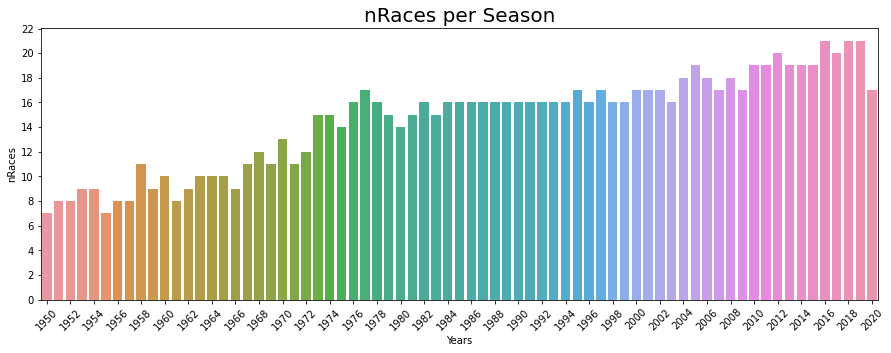

In [31]:
#Plotting the list
fig_dims=(15,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = yearRounds, y = countRounds)
plt.xlabel("Years")
plt.ylabel("nRaces")
plt.title("nRaces per Season", fontsize=20)
ax.set_yticks(range(23))

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2!=0:
        xticks[i].set_visible(False)

yticks=ax.yaxis.get_major_ticks()
for i in range(len(yticks)):
    if i%2!=0:
        yticks[i].set_visible(False)

ax.set_xticklabels(yearRounds,rotation=45);

This plot shows us the situation of the years regarding the number of races being held. At every season the F1 was becoming more and more wealthy and popular, in consequence more countries wanted to celebrate a F1 round on their territory. This fact helped the F1 to arrive to the people nowadays watch and enjoy this motorsport.

### 4.2 Race Locations

We have seen how the F1 history move fordward increasing the race participation. But how was that propagation? Where did the races take place?

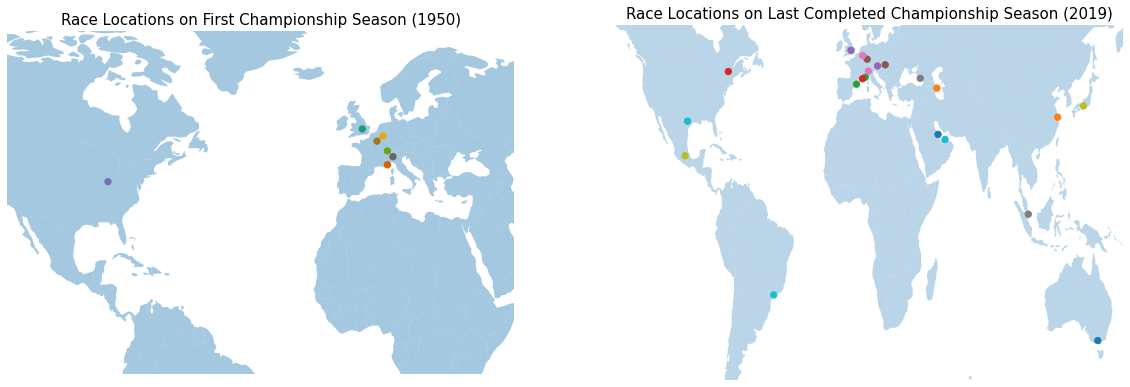

In [32]:
crs={"init":"epsg:4326"}
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
races=racesDF.loc[racesDF["year"]==1950]
races2019=racesDF.loc[racesDF["year"]==2019]
z=np.random.rand(100,100)

lat=[]
lon=[]

lat1=[]
lon1=[]


for race in races["circuitId"]:
    lat.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lat"].iloc[0])
    lon.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lng"].iloc[0])

races.insert(8,"lat", lat, True)
races.insert(9,"lng", lon, True)
points1950 = [Point(xy) for xy in zip( races["lng"], races["lat"])]
geo1950 = gpd.GeoDataFrame(races, geometry=points1950, crs=crs)


for race in races2019["circuitId"]:
    lat1.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lat"].iloc[0])
    lon1.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lng"].iloc[0])

races2019.insert(8,"lat", lat1, True)
races2019.insert(9,"lng", lon1, True)
points2019 = [Point(xy) for xy in zip( races2019["lng"], races2019["lat"] )]
geo2019 = gpd.GeoDataFrame(races2019, geometry=points2019, crs=crs)



fig,(ax1, ax2) = plt.subplots(ncols=2)


for ax in [ax1, ax2]:
    if ax == ax1:
        ax.axis("off")
        world.plot(ax=ax, alpha=0.4)
        geo1950.plot(ax=ax, markersize=40, marker="o",cmap='Dark2')
        ax.set_ylim([-5,75])
        ax.set_xlim([-120,50])
        ax.set_title("Race Locations on First Championship Season (1950)", fontsize=15)
    else:
        ax.axis("off")
        world.plot(ax=ax, alpha=0.3)
        geo2019.plot(ax=ax, markersize=40, marker="o", cmap="tab10")
        ax.set_ylim([-50,60])
        ax.set_xlim([-140,160])
        ax.set_title("Race Locations on Last Completed Championship Season (2019)", fontsize=15)

asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp*0.7)
fig.set_size_inches(20,8)


Looking at both maps we can conclude the basic ideas. First of all, the first Championship took place mostly on Europe, since the F1 organization is from Europe, having the only outside Europe race taking place on the Indianapolis circuit (Indiana, USA).

If we compare with what can we have today, it is a clearly different image. Having all the continents less Antarctica one race at least. Because its Europe origin, it is the continent with more races taking place. This fact it's caused because American people dislikes racing, it is just the opposite. They have a high racing culture, but they clearly prefer competitions like IMSA, Nascar or Indy, lot more simple and with more spectacle.

### 4.3 Final Status

At the end of the race, not all the drivers cross the final line. The lower probability on F1 is that every driver that took place on the grid passes the finish line. Instead, the average of drivers being retired from a race is 3-4 per race. This value highly depends on the circuit where the race is racing, the weather, and some random staff as the possible mechanical failures the car can suffer.

In order to have a brief idea about this fact, we are going to represent the higher frequencies ocurring on the Results Dataset.

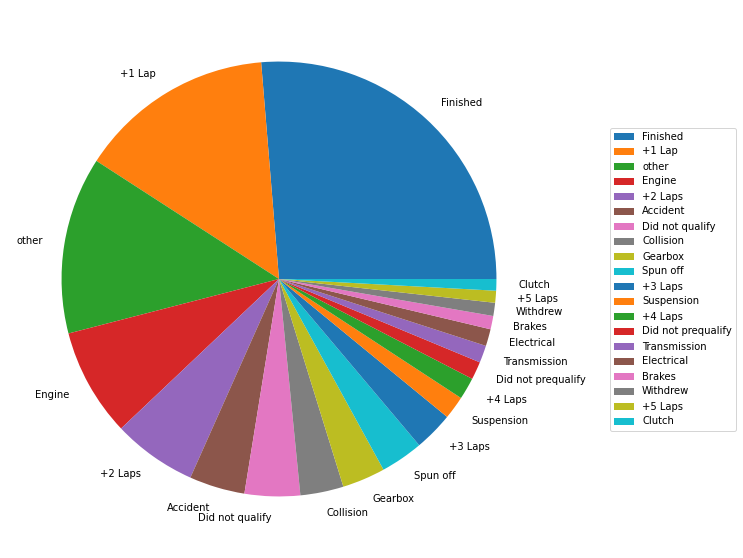

In [33]:
status = resultsDF['statusId'].value_counts()
statusFrame = status.to_frame()

indexnames={}
for idx in statusFrame.index:
    name = statusDF.loc[statusDF["statusId"]==idx, "status"].iloc[0]
    indexnames[idx]=name
statusDef=statusFrame.rename(index=indexnames)

s=statusDef["statusId"]
otherS = s.groupby(np.where(s>=200,s.index,'other')).sum()
otherS=otherS.sort_values(ascending=False)
otherS.plot.pie(figsize=(10, 10));
plt.axis("off")
plt.legend(bbox_to_anchor=(1.1, 0.5), loc="center left");

With the help of this pie chart we can understand better how the status at the end of the race is distributed. Mainly, a bit more of the 25% is a car finishing the race on the same lap as the leader. The next space is for the +1 Lap, that is, a driver finishing the race with a lap less than the leader of the race. The other section joins all the little percentage of the rest that cannot be shown in the pie because of its little importance. Then we have car failures as the Engine with a high percentage, accidents, no qualifying for the race, collision with another car, the gearbox, etc.

### 4.4 Accidents per Circuit

In the previous point we saw the percentage of the final status for all the race results. It is clear that there are car failures that are inevitable, such as engine or gearbox failure. But then there are ones caused by the proper drivers or the circuit itself. The first because of driving errors and the second one because the circuit could be difficult, risky or the weather.

In [34]:
circuits = []
for ids in resultsDF.raceId:
    circuits.append(racesDF.loc[racesDF["raceId"]==ids, "circuitId"].iloc[0])
resultsDF["circuitId"] = circuits

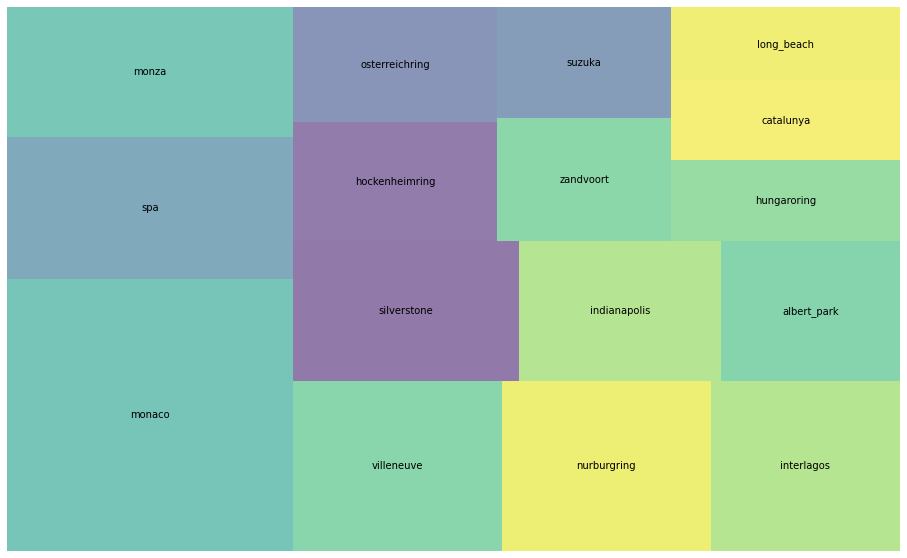

In [35]:
accidentesDF = pd.merge(resultsDF, racesDF, how="inner", on=["raceId"]).drop(["circuitId_y"], axis = 1)
accidentesDF.rename({"circuitId_x" : "circuitId"}, axis = 1, inplace = True)
accidentesDF = pd.merge(accidentesDF, circuitsDF, how="left", on=["circuitId"])

accidentes = {}
nombres = []
for index, row in circuitsDF.iterrows():
    accidentes[row.circuitId] = 0
    nombres.append(row.circuitRef)

for index, row in resultsDF.iterrows():
    if int(row.statusId) in [3, 4]:
        accidentes[row.circuitId] += 1
res = {}

for idx in range(len(accidentes)):
    res[nombres[idx]] = accidentes[idx+1]
res = dict( sorted(res.items(), key=operator.itemgetter(1),reverse=True))


res = {key:val for key, val in res.items() if val > 40}

volume = [*res.values()]
labels = [*res.keys()]


squarify.plot(sizes=volume, label=labels, alpha=0.6)

fig = plt.gcf()
plt.axis("off")
fig.set_size_inches(16, 10)
plt.show()

In this tree map we can see the amount of accidents or collisions made on every circuit. There aren't all the circuits but the ones which have the higher number of accidents or collisions. Monaco is set to be the top circuit where the collisions and accidents occur. It makes a lot of sense giving that Monaco is the urban circuit with the narrowest track.

![title](img/monaco.jpg)

### 4.5 Driver Wins

Lots of drivers have passed through the F1 history, but not everyone achieve the top charts of the Competition. For that reason, we are observing the amount of victories all the drivers had on their motorsport participation.

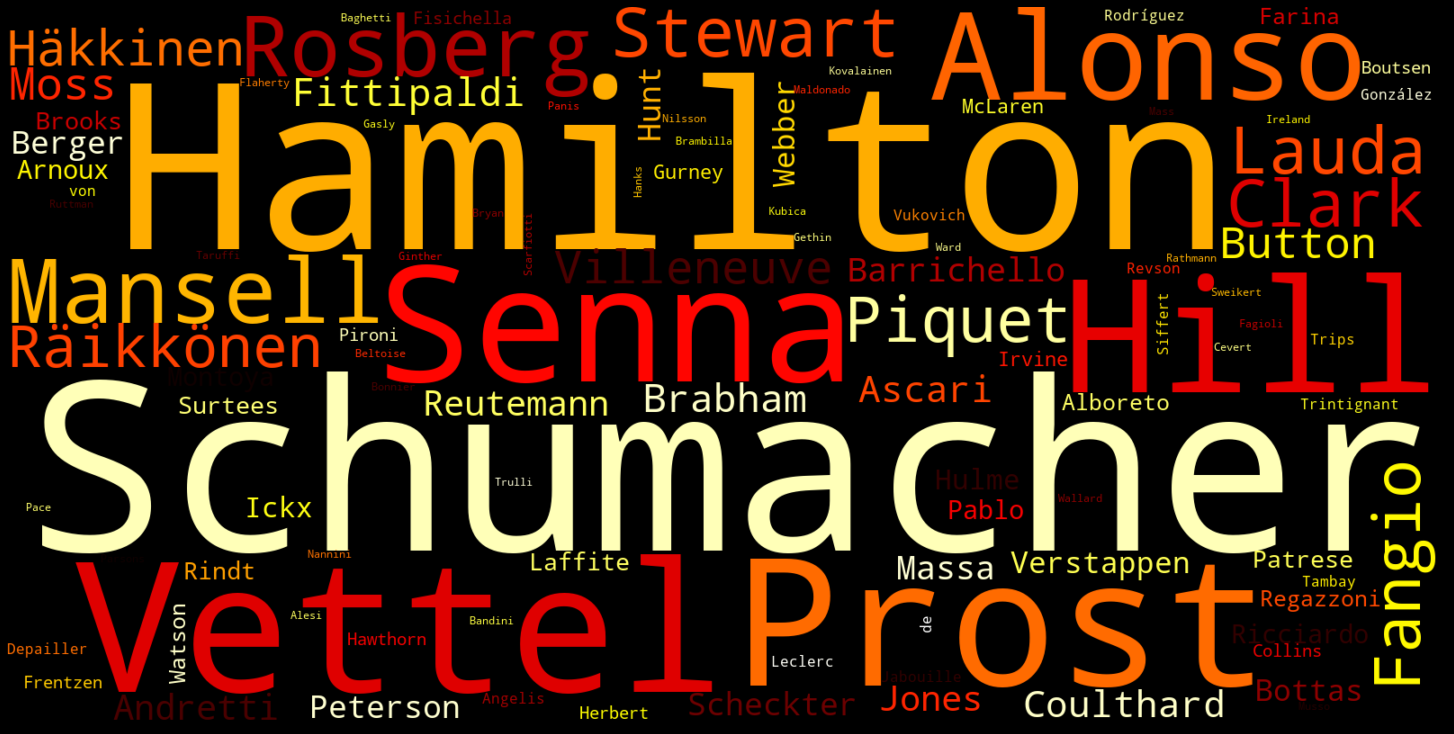

In [189]:
winResults = resultsDF[resultsDF['position'] == "1"]
wins = winResults['driverId'].tolist()
str2 = []

for idx in range(len(wins)):
    name = driversDF.loc[driversDF["driverId"]==int(wins[idx]), "surname"].iloc[0]
    str2.append(name)

str2=str(str2)
str2 = str2.replace(",", "")
str2 = str2.replace("'", "")
str2 = str2.replace(" ", "\n")

wordcloud = WordCloud(width=1600, height=800, margin=0,collocations=False, colormap="hot").generate(str(str2))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('cloudword.png')
plt.show()

This is a WordCloud showing the race winners. The bigger the font size is the more wins the driver have. Michael Schumacher and Lewis Hamilton are the drivers that have the largest amount of victories in their career.

The race victory is well relationed to the position grid where the drivers start the race. But it is not all about this fact, things like tyre strategy, car performance on the race, collisions, etc. The Pole Position on F1 is how is it called to classify first in the qualifying season. Let's see how much affect being on Pole Position at the start of the race and then finishing leader per each circuit.

In [37]:
perCircuits = {}
circuits = []
poleResults = resultsDF[resultsDF["grid"]==1]

for race in poleResults.raceId:
    circuit = racesDF.loc[racesDF["raceId"]==race, "circuitId"].iloc[0]
    circuits.append(circuit)

poleResults["circuitId"]=circuits

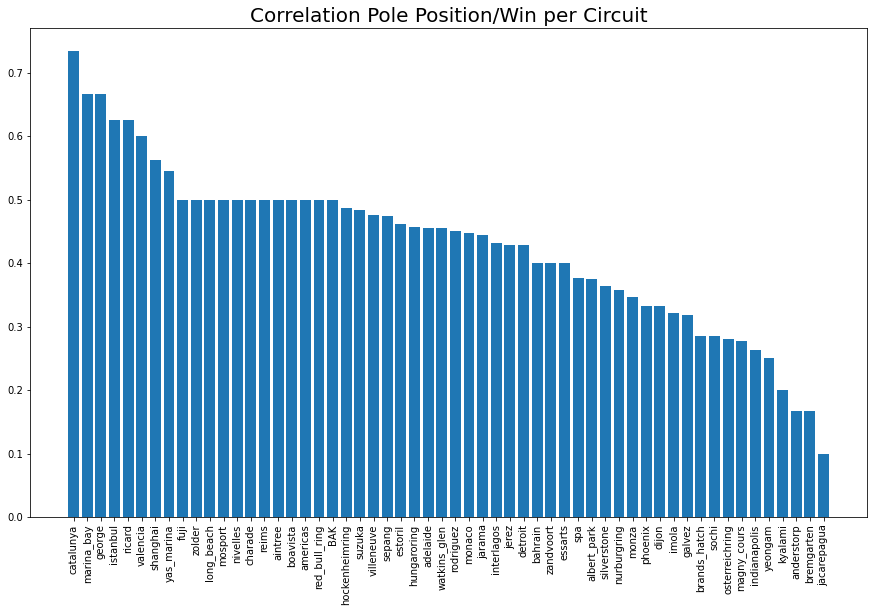

In [38]:
delta=[]
names={}

for index, row in poleResults.iterrows():
    delta.append(row.grid == row.positionOrder)

poleResults["poleWin"]=delta

for circuits in poleResults.circuitId.unique():
    counter=0
    perfect=0
    circuitResults = poleResults[poleResults["circuitId"]==circuits]
    for index, row in circuitResults.iterrows():
        if row.poleWin:
            perfect+=1
        counter+=1
    perCircuits[circuits]=perfect/counter


for key in perCircuits.keys():
    name = circuitsDF.loc[circuitsDF["circuitId"]==key,"circuitRef"].iloc[0]
    names[name]=perCircuits[key]


sortedNames = {}
sortedKeys = sorted(names, key=names.get, reverse=True)
for w in sortedKeys:
    sortedNames[w] = names[w]
    
#Delete the less significant circuits (1-2 races held)
sortedNames.pop("pedralbes")
sortedNames.pop("pescara")
sortedNames.pop("ain-diab")
sortedNames.pop("sebring")
sortedNames.pop("zeltweg")
sortedNames.pop("lemans")
sortedNames.pop("tremblant")
sortedNames.pop("montjuic")
sortedNames.pop("las_vegas")
sortedNames.pop("dallas")
sortedNames.pop("donington")
sortedNames.pop("okayama")
sortedNames.pop("riverside")
sortedNames.pop("avus")
sortedNames.pop("monsanto")
sortedNames.pop("buddh")
sortedNames.pop("mugello")
sortedNames.pop("portimao")

plt.figure(figsize=(15,9))
plt.bar(range(len(sortedNames)), list(sortedNames.values()), align="center")
plt.xticks(range(len(sortedNames)), list(sortedNames.keys()),rotation=90)
plt.title("Correlation Pole Position/Win per Circuit", fontsize=(20))


plt.show()

The Circuit de Barcelona-Catalunya is shown to be the place where the Pole Position affects more to the final result, maybe made because its difficulty of overtake.

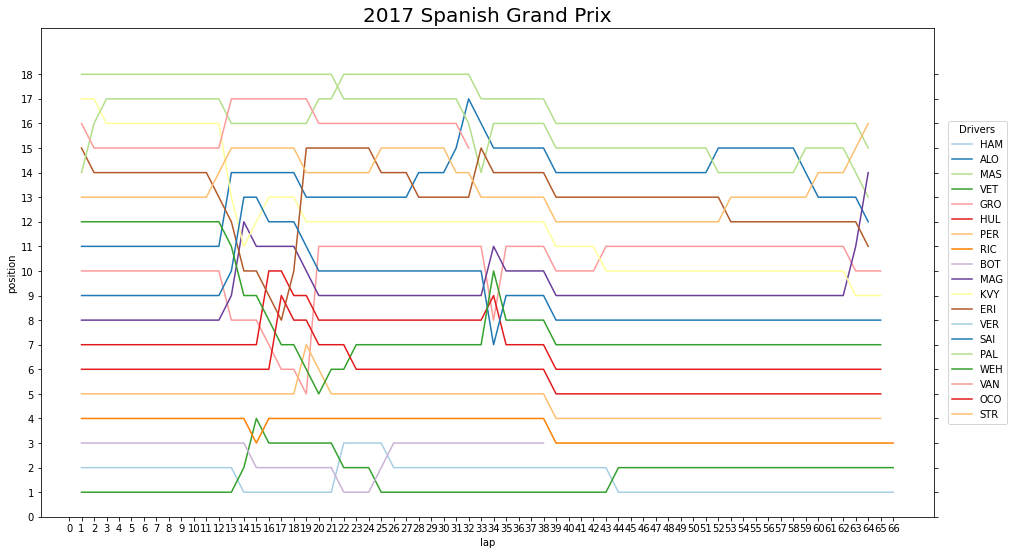

In [39]:
fig = plt.figure(figsize=(16,9))
_ = sns.lineplot(x="lap", y="position", hue="driverId", data=lapTimesDF[lapTimesDF["raceId"]==973], palette="Paired", legend="full")
_.set_yticks(range(19))
_.set_xticks(range(67))
_.yaxis.set_ticks_position("both")

driversNum=lapTimesDF[lapTimesDF["raceId"]==973]["driverId"].unique()
driversNum.sort()
names = []

for num in driversNum:
    names.append(driversDF.loc[driversDF["driverId"]==num, "code"].iloc[0])

#race{year;name}
race={}
race["year"]=racesDF.loc[racesDF["raceId"]==973, "year"].iloc[0]
race["name"]=racesDF.loc[racesDF["raceId"]==973, "name"].iloc[0]
plt.title(str(race["year"])+ " " + str(race["name"]), fontsize=20)
plt.legend(title="Drivers",labels=names, bbox_to_anchor=(1.01, 0.5), loc="center left");

We can do a race trace to watch the drivers performance lap by lap, seeing in which lap an overtake occur and when certain driver entered the pit lane to make a pit stop or a sanction.

## 5. Data Preparation

We have a lot of data spread out on many datasets, so we must do a heavy data preparation in order to make a proper trained model fed with all those datasets.

The first modification will take place on the Results Dataset. We will add the year and round of every result and the fastest lap time in millisecond per each driver.

In [40]:
years = []
rounds = []
circuits = []
times = []
for ids in resultsDF.raceId:
    years.append(racesDF.loc[racesDF["raceId"]==ids, "year"].iloc[0])
    rounds.append(racesDF.loc[racesDF["raceId"]==ids, "round"].iloc[0])
    circuits.append(racesDF.loc[racesDF["raceId"]==ids, "circuitId"].iloc[0])
    
for lapTimes in resultsDF.fastestLapTime:
    x = lapTimes.split(".")
    try:
        dt_obj = time.strptime(lapTimes, "%M:%S.%f")
        millitime = datetime.timedelta(hours=dt_obj.tm_hour,minutes=dt_obj.tm_min,seconds=dt_obj.tm_sec,milliseconds=int(x[1])).total_seconds()*1000
        times.append(millitime)
    except:
        #if no time is set at the end of the race (the driver didnt finish the race, it will count as if its fastest lap lasted 5 mins)
        times.append(300000)
resultsDF["year"] = years
resultsDF["round"] = rounds
resultsDF["circuitId"] = circuits
resultsDF["fastestLapMill"] = times

### Weather Dataset

As the notebook was going forward, I noticed that there are lots of data missing that are relevant when a race prediction is needed. One of those needs was the weather. A single race changes drastically if it is raced under dry conditions or wet conditions. The driving is more cautious, the tyres are different: they have more grip and drains lot better the water, but they are significantly slower than the slick tyres. In fact, the car does not have the key of the driver performance, since its own hands are the focus of the race pace.

So, returning to the weather, I went through all the wikipedia links of the races. The access was easy because the races Dataset kept record of the link for every race. The only thing to do was searching on the right article header the weather condition and store it on the notebook.

In [41]:

if os.path.exists("./data/weatherInfo.csv"):
    #Reading the csv file storing the weather dataset
    weatherInfo = pd.read_csv("./data/weatherInfo.csv")

else:
    
    weather = racesDF.iloc[:,[1,2,3]]
    state = []

    for link in racesDF.url:
        #searching the word weather on the wikipedia header
        try:
            df = pd.read_html(link)[0]
            if "Weather" in list(df.iloc[:,0]):
                idx = list(df.iloc[:,0]).index("Weather")
                state.append(df.iloc[idx,1])
            else:
                df = pd.read_html(link)[1]
                if "Weather" in list(df.iloc[:,0]):
                    idx = list(df.iloc[:,0]).index("Weather")
                    state.append(df.iloc[idx,1])
                else:
                    df = pd.read_html(link)[2]
                    if "Weather" in list(df.iloc[:,0]):
                        idx = list(df.iloc[:,0]).index("Weather")
                        state.append(df.iloc[idx,1])
                    else:
                        df = pd.read_html(link)[3]
                        if "Weather" in list(df.iloc[:,0]):
                            idx = list(df.iloc[:,0]).index("Weather")
                            state.append(df.iloc[idx,1])
                        else:
                            #if it is not found, open the link as a browser and go through the italian page, as it seems to be the most documentated about F1
                            explorer = webdriver.Chrome()
                            explorer.get(link)

                            lang = explorer.find_element_by_link_text("Italiano")
                            lang.click()

                            itaWeather = explorer.find_element_by_xpath('//*[@id="mw-content-text"]/div/table[1]/tbody/tr[9]/td').text
                            state.append(itaWeather)




        except:
            state.append("not found")

    weather["weather"] = state

    #Create a dict of all the weather conditions founded and the common description
    weatherDict = {'weather_warm': ['soleggiato', 'clear', 'warm', 'hot', 'sunny', 'fine', 'mild', 'sereno'],
                   'weather_cold': ['cold', 'fresh', 'chilly', 'cool'],
                   'weather_dry': ['dry', 'asciutto'],
                   'weather_wet': ['showers', 'wet', 'rain', 'pioggia', 'damp', 'thunderstorms', 'rainy'],
                   'weather_cloudy': ['overcast', 'nuvoloso', 'clouds', 'cloudy', 'grey', 'coperto']}

    weatherDF = pd.DataFrame(columns = weatherDict.keys())
    for col in weatherDF:
        weatherDF[col] = weather["weather"].map(lambda x: 1 if any(i in weatherDict[col] for i in x.lower().split()) else 0)

    weatherInfo = pd.concat([weather, weatherDF], axis = 1)
    
    #Save the dataset as a csv file to not repeat the same process
    weatherInfo.to_csv("./data/weatherInfo.csv", index=False)

Now we have a dataset containing the weather condition of every race which their weather was recorded.

### Merging

I considered merging all the useful data in just one dataset would be the best way to fit the data and train the model. So the merging started with the recent Weather Dataset and the Races Dataset. The result is a dataset that contains information about the race and its weather condition.

In [42]:
df1 = pd.merge(racesDF, weatherInfo, how="inner", on=["year", "round", "circuitId"]).drop(["weather", "time", "url"], axis=1)

The second merge is with the Results and the Drivers Dataset. This combination filled every result instance with the basic information about the driver: his name, his date of birth and his nationality.

In [43]:
resultsDriversDF = pd.merge(resultsDF,driversDF,how="left", on=["driverId"]).drop(["code", "forename", "surname", "url", "number_y", "number_x"], axis=1)

Having this new results dataset, the next merge will consist on the combination between the first merge and the recent Result Drivers Dataset. After the merge, we have a dataset with the full information about the race and the circuit, all the information regarding the driver and the race conditions.

In [44]:
df2 = pd.merge(df1, resultsDriversDF, how="inner", on=["year", "round", "circuitId", "raceId"]).drop(["points", "statusId", "position", "positionText", "time", "rank", "fastestLapSpeed", "laps"], axis=1)

Column renames were needed in order to classify between driver and constructor attributes.

In [45]:
driverStandingsDF.rename(columns={"position":"driverStandingPosition", "positionText":"driverStandingPositionText"}, inplace=True)

The fourth merged dataset was the result of adding to the previous dataset the information about the driver standings after each race result. With this data we could see where was the driver on the classification table, how many points scored in that race and how many wins the driver had on this certain time.

In [46]:
df3 = pd.merge(df2, driverStandingsDF, how="left", on=["raceId","driverId"]).drop(["driverStandingsId", "driverStandingPositionText","fastestLapTime","fastestLap"], axis=1)

In [47]:
#Changing the constructors display from ID's to proper names
constructors = []
for constructor in df3.constructorId:
    constructors.append(constructorsDF.loc[constructorsDF["constructorId"]==constructor, "constructorRef"].iloc[0])
df3["constructor"] = constructors
df3 = df3.drop(["constructorId"], axis=1)

The final merging is about adding the constructor information to the Result merged Dataframe. Before it takes place, we need to modify the way all data on this Dataset is being displayed. All the ID's are modified and erased, being in its place the proper name or number, not the ID.

In [48]:
constructorStandingsFinalDF = constructorStandingsDF

years = []
rounds = []
constructors = []
for ids in constructorStandingsFinalDF.raceId:
    years.append(racesDF.loc[racesDF["raceId"]==ids, "year"].iloc[0])
    rounds.append(racesDF.loc[racesDF["raceId"]==ids, "round"].iloc[0])
for ids in constructorStandingsFinalDF.constructorId:
    constructors.append(constructorsDF.loc[constructorsDF["constructorId"]==ids, "constructorRef"].iloc[0])
    
constructorStandingsFinalDF["year"] = years
constructorStandingsFinalDF["round"] = rounds
constructorStandingsFinalDF["constructor"] = constructors

constructorStandingsFinalDF = constructorStandingsFinalDF.drop(["constructorStandingsId", "raceId", "constructorId", "positionText"], axis = 1)
constructorStandingsFinalDF = constructorStandingsFinalDF.rename(columns={"points": "constructorPoints", "wins": "constructorWins", "position":"constructorPosition"})

Moreover, the column names were renamed in order to distinguish between driver and constructor standings, wins or points.

In [49]:
df4 = pd.merge(df3, constructorStandingsFinalDF, how="left", on=["year", "round", "constructor"])
df4.grid = df4.grid.replace({0: 35})

So merge done. And so there is the other Dataset modification. It consists on making the non qualifyed cars (those which didn't make time on the qualifying session and start at the back of the grid or from the pit lane) represented with a 0 on default changed to 35, as the maximum number of cars on the grid is 34.

As it was talked before, the qualification seasson has been suffering changes since it was created, so the Qualifying Dataset has a general structure that fits all the systems. In order to fit our particular Dataset, we need to do a tune on the data structure. The times are organized as Q1, Q2 and Q3, depending where did the driver achieve the time and if he was eliminated on any round. So the solution was to make a single column having the best time of the three sessions, first looking at the Q3 time, if no time was set then searching into the Q2 and finally if no time was found getting the Q1 time. If there wasn't time set it is set to 5 mins.

In [50]:
qualyTime = []
for index, row in qualifyingDF.iterrows():
    if row.q3 != str(r"\N"):
        qualyTime.append(row.q3)
    else:
        if row.q2 != str(r"\N"):
            qualyTime.append(row.q2)
        else:
            if row.q1 != str(r"\N"):
                qualyTime.append(row.q1)
            else:
                qualyTime.append(0)
qualifyingFinalDF = qualifyingDF
qualifyingFinalDF["qualyTime"] = qualyTime
qualifyingFinalDF=qualifyingFinalDF.drop(["q1", "q2", "q3", "number", "qualifyId"], axis=1)
qualifyingFinalDF = qualifyingFinalDF.rename(columns={"position":"grid"})

rounds = []
years = []
for race in qualifyingFinalDF.raceId:
    rounds.append(racesDF.loc[racesDF["raceId"]==race, "round"].iloc[0])
    years.append(racesDF.loc[racesDF["raceId"]==race, "year"].iloc[0])
    

qualifyingFinalDF = qualifyingFinalDF.drop(["raceId"], axis=1)
qualifyingFinalDF["year"] = years
qualifyingFinalDF["round"] = rounds

#Merge the new qualifying dataset with df4

finalDF = pd.merge(df4, qualifyingFinalDF, how="left", on=["year", "round", "driverId"]).drop(["constructorId", "grid_y"], axis=1)
#deleting the qualification grid and keeping the race final grid
finalDF = finalDF.rename(columns={"grid_x":"grid"})

There is a problem with the grid value of both datasets. Meanwhile the grid value of the Qualifying Dataset is for the grid itself achieved on the session, the grid value in df4 is the final grid that started the race, with all the penalizations and car failures applied. For a better performance on the future model, the decision was to maintain the race final grid and drop the qualifying raw position. This decision brought more information about the race to the model.

In [51]:
minValue = finalDF['year'].min()
maxValue = finalDF['year'].max()
print("First Dataset year:", minValue)
print("Last Dataset year:",maxValue)

First Dataset year: 1950
Last Dataset year: 2020


We mantain the Dataset original time range. How about the missing values?

In [52]:
print("missing values:\n",finalDF.isna().sum())

missing values:
 raceId                        0
year                          0
round                         0
circuitId                     0
name                          0
date                          0
weather_warm                  0
weather_cold                  0
weather_dry                   0
weather_wet                   0
weather_cloudy                0
resultId                      0
driverId                      0
grid                          0
positionOrder                 0
milliseconds                  0
fastestLapMill                0
driverRef                     0
dob                           0
nationality                   0
points                      481
driverStandingPosition      481
wins                        481
constructor                   0
constructorPoints          1875
constructorPosition        1875
constructorWins            1875
qualyTime                 16511
dtype: int64


We have 2 main categories that have missing values. First is the points and standings: if the constructor or the driver did not finish a race or score points at the first races, no points or standings were assigned. This have an easy solution: fill those gaps with 0's.

In [53]:
for col in ["points", "driverStandingPosition", "wins", "constructorPoints", "constructorPosition", "constructorWins"]:
    finalDF[col].fillna(0, inplace = True)
    finalDF[col] = finalDF[col].map(lambda x: int(x))

The other category was the qualifying time. If a driver could not finish the Q1 because of a collision or a car failure, a time is not set, so it generates a missing value. The solution is filling those spaces with a generic low time. It was decided to put a 5 minutes lap. 

In [54]:
finalDF["qualyTime"] = finalDF["qualyTime"].fillna(value=0)
finalDF.loc[(finalDF.qualyTime == 0), "qualyTime"] = "4:59.999"
finalDF.loc[(finalDF.milliseconds == r"\N"), "milliseconds"] = 99999999

In [55]:
print("Missing values:\n",finalDF.isna().sum().sum())

Missing values:
 0


So that's it, no missing values at all.

Thanks at the date of birth that was stored into every driver instance, we could calculate the age each driver was at every race. That gives us a lot of information because the sport knows very well abot age.

In [56]:
#age on every race for drivers
finalDF["date"] = pd.to_datetime(finalDF.date)
finalDF["dob"] = pd.to_datetime(finalDF.dob)
finalDF["driverAge"] = finalDF.apply(lambda x: relativedelta(x["date"],x["dob"]).years, axis=1)
finalDF.drop(["date", "dob"], axis=1, inplace=True)

Other useful information is showing not only the qualification time obtained, but the difference between the Pole Position and ever driver in the same grid.

In [57]:
finalDF["qualyTime"] = finalDF.qualyTime.map(lambda x: 0 if str(x) == "00.000" else(float(str(x).split(":")[1]) + (60 * float(str(x).split(":")[0])) if x!= 0 else 0))
finalDF = finalDF[finalDF["qualyTime"] != 0]
finalDF.sort_values(["year", "round", "grid"], inplace = True)
finalDF["qualyDiff"] = finalDF.groupby(["year", "round"]).qualyTime.diff()
finalDF["qualyTime"] = finalDF.groupby(["year", "round"]).qualyDiff.cumsum().fillna(0)
finalDF.drop("qualyDiff", axis=1, inplace=True)

In [58]:
#drop was needed thanks to a no complete information
finalDF.drop(finalDF.tail(20).index,inplace=True)

Having a good Dataset to start training models and making predictions, the Dataset remains with some useless information that could become noise. Those were all the ID's information, as we already had the drivers, constructors, races and circuits names on the Dataset. Another data to erase was de milliseconds attribute, it is the time in milliseconds that each driver completed the full race. Obviously, if we fed the model with this parameter, would found the first place on the 99% times, it just need to find the driver with less amount of time and finished the race. 

In [59]:
del finalDF['circuitId']
del finalDF['raceId']
del finalDF['resultId']
del finalDF["driverId"]
del finalDF['milliseconds']

The final step id to convert those categorical attributes to numbers, and dummies are just that. The final Dataset includes dummies where the column was a name (circuit or nationality) or weather description.

In [60]:
# name -> circuit name
dummies = pd.get_dummies(finalDF, columns = ["name", "nationality", "constructor"])

indexNames = dummies[dummies["year"] < 1989].index
dummies.drop(indexNames, inplace=True)

for col in dummies.columns:
    if "name" in col and dummies[col].sum() < 60:
        dummies.drop(col, axis=1, inplace=True)
    elif "nationality" in col and dummies[col].sum() < 60:
        dummies.drop(col, axis=1, inplace=True)
    elif "constructor" in col and dummies[col].sum() < 80:
        dummies.drop(col, axis=1, inplace=True)
    else:
        pass

Also there was a drop of every entry older than 1989. This is because history in F1 goes so fast. A lot of regulation changes and improvements are done through all years.

<img src="img/evolution.jpg" style="width: 250px;"/>

So why 1989? F1 is splited on different "eras". Separations are always by big changes caused by new regulations. The 1989-1993 era was the introduction of 3.5-litre naturally aspirated engines, active suspensions and electronic driver aids. Probably, the biggest change the competition suffered since that moment. On 1994 there was the Safety regulation, on 2000 the V10 engines, etc.

In [61]:
dummies.head()

,year,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,positionOrder,fastestLapMill,driverRef,points,driverStandingPosition,wins,constructorPoints,constructorPosition,constructorWins,qualyTime,driverAge,name_Abu Dhabi Grand Prix,name_Argentine Grand Prix,name_Australian Grand Prix,name_Austrian Grand Prix,name_Azerbaijan Grand Prix,name_Bahrain Grand Prix,name_Belgian Grand Prix,name_Brazilian Grand Prix,name_British Grand Prix,name_Canadian Grand Prix,name_Chinese Grand Prix,name_European Grand Prix,name_French Grand Prix,name_German Grand Prix,name_Hungarian Grand Prix,name_Indian Grand Prix,name_Italian Grand Prix,name_Japanese Grand Prix,name_Korean Grand Prix,name_Malaysian Grand Prix,name_Mexican Grand Prix,name_Monaco Grand Prix,name_Portuguese Grand Prix,name_Russian Grand Prix,name_San Marino Grand Prix,name_Singapore Grand Prix,name_Spanish Grand Prix,name_Turkish Grand Prix,name_United States Grand Prix,nationality_American,nationality_Australian,nationality_Austrian,nationality_Belgian,nationality_Brazilian,nationality_British,nationality_Canadian,nationality_Colombian,nationality_Danish,nationality_Dutch,nationality_Finnish,nationality_French,nationality_German,nationality_Italian,nationality_Japanese,nationality_Mexican,nationality_Monegasque,nationality_Polish,nationality_Portuguese,nationality_Russian,nationality_Spanish,nationality_Swedish,nationality_Swiss,nationality_Venezuelan,constructor_ags,constructor_arrows,constructor_bar,constructor_benetton,constructor_bmw_sauber,constructor_brabham,constructor_caterham,constructor_dallara,constructor_ferrari,constructor_footwork,constructor_force_india,constructor_haas,constructor_honda,constructor_hrt,constructor_jaguar,constructor_jordan,constructor_larrousse,constructor_ligier,constructor_lotus_f1,constructor_marussia,constructor_mclaren,constructor_mercedes,constructor_minardi,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_stewart,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams
8359,1989,1,1,0,0,0,0,1,11,300000.0,senna,0,11,0,6,2,0,0.0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8363,1989,1,1,0,0,0,0,2,15,300000.0,patrese,0,15,0,0,12,0,0.0,34,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8373,1989,1,1,0,0,0,0,3,25,300000.0,berger,0,24,0,9,1,1,0.0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8371,1989,1,1,0,0,0,0,4,23,300000.0,boutsen,0,22,0,0,12,0,0.0,31,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8350,1989,1,1,0,0,0,0,5,2,300000.0,prost,6,2,0,6,2,0,0.0,34,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
dummies.to_csv("./data/finalDF.csv", index=False)

## 7. Model Creation

In order to make the best F1 predictor both regressor and classifier could work with our Dataset. In both methods, the race positions were mapped as 1 (winner) and 0 (not winner). Also a specific score function was created for each of the methods.

### Regression

The regression application on this Dataset is based on predict the result with any regression model and sort all the drivers in an ascending order. With this, the lower valued driver is the predicted winner of the race, and is compared with the actual winner of the race. As we are trying to predict the entire 2019 season, we train with all the data since 1989 less all the races on 2019.

When the function got the score of all the test races (year == 2019), the function returns the percentage of the correct races predictions. 

Because of having custom score functions, I did manual Grid Searches, tunning by myself the parameters doing try and error. 

In [71]:
#Importing the final Dataset
f1DF = pd.read_csv("./data/finalDF.csv")

In [72]:
#Dict to store all models parameters with their scores
paramsDict = {"model":[], "params":[], "score":[]}

In [73]:
#regression common data
predictingYear = 2019


regressionDF = f1DF.copy()
scaler = StandardScaler()

trainSet = regressionDF[regressionDF.year != int(predictingYear)]
xTrain = trainSet.drop(["driverRef", "positionOrder"], axis=1)
yTrain = trainSet.positionOrder

xTrain = pd.DataFrame(scaler.fit_transform(xTrain), columns = xTrain.columns)

In [74]:
#scoring functions
def scoreRegression(model, predictYear, model_params):
    score = 0
    driversList = []
    fullPredictionDF = pd.DataFrame(columns=["results","driver","positionOrder","real","predicted"])
    
    for race in f1DF[f1DF.year == int(predictYear)]["round"].unique():
        
        #train/test
        
        testDF = f1DF[(f1DF.year == int(predictYear)) & (f1DF["round"] == race)]
        driversList = f1DF[(f1DF.year == int(predictYear)) & (f1DF["round"] == race)]["driverRef"].tolist()
        xTest = testDF.drop(["driverRef", "positionOrder"], axis=1)
        yTest = testDF.positionOrder
        
        #scaler
        xTest = pd.DataFrame(scaler.transform(xTest), columns = xTest.columns)
        
        #predictions
        predictionDF = pd.DataFrame(model.predict(xTest), columns = ["results"])
        predictionDF["driver"] = driversList
        predictionDF["positionOrder"] = yTest.reset_index(drop=True)
        predictionDF["real"] = predictionDF.positionOrder.map(lambda x: 1 if x == 1 else 0)
        predictionDF.sort_values("results", ascending = True, inplace = True)
        predictionDF.reset_index(inplace = True, drop = True)
        predictionDF["predicted"] = predictionDF.index
        predictionDF["predicted"] = predictionDF.predicted.map(lambda x:1 if x== 0 else 0)
        
        
        score += precision_score(predictionDF.real, predictionDF.predicted)
        
        
        
        fullPredictionDF = fullPredictionDF.append(predictionDF, ignore_index=True)
        
        
        
    totalScore = score / f1DF[f1DF.year == int(predictYear)]["round"].unique().max()
    fullPredictionDF.to_csv(f"./predictions/Reggresion{model_params}.csv", index=False)
    
    return totalScore

Additionaly, the result of every parameter set is stored in the "predictions" folder.

After a model and score execution, the custom output table would look like the one below. In this case, it's a linear regression model. It is shown the result of the regression, the driver name, the real position at the finish of the race, the real 1-0 mapped position (1 = winner / 0 = no winner) and the predicted 1-0 mapped position.

<img src="img/regression.png" style="width: 400px;"/>

On this example, the subscore would be 1, as the predicted winner is the actual winner of the race. 

In [75]:
#linear regression

params={"fit_intercept" : ["True", "False"]}

for fit_intercept in params["fit_intercept"]:
    model_params = (fit_intercept)
    model = LinearRegression(fit_intercept = fit_intercept)
    model.fit(xTrain, yTrain)
    
    string_params = ("linearRegression-" + str(fit_intercept))
    
    modelScore = scoreRegression(model, predictingYear, string_params)
    
    paramsDict["model"].append("linearRegression")
    paramsDict["params"].append(model_params)
    paramsDict["score"].append(modelScore)

In [77]:
## random forest regressor

params={"max_features": ["auto", 0.5, None],
        "n_estimators": [50, 100, 500],
        "max_depth": [5, 10, 20]}

for feature in params["max_features"]:
    for estimator in params["n_estimators"]:
        for depth in params["max_depth"]:
            model_params = (feature, estimator, depth)
            model = RandomForestRegressor(criterion = "mse", max_features = feature, n_estimators=estimator, max_depth=depth, random_state=42)
            model.fit(xTrain, yTrain)
            
            
            string_params = ("randomForest-"+str(feature), str(estimator), str(depth))
            modelScore = scoreRegression(model, predictingYear, string_params)
            
            paramsDict["model"].append("randomForestRegressor")
            paramsDict["params"].append(model_params)
            paramsDict["score"].append(modelScore)

In [79]:
#svm regressor

params={"gamma": [0.1, 0.6],
        "C": [2, 5, 15],
        "kernel": ["linear", "rbf"]}

for gamma in params["gamma"]:
    for c in params["C"]:
        for kernel in params["kernel"]:
            model_params = (gamma, c, kernel)
            model = svm.SVR(gamma = gamma, C = c, kernel = kernel)
            model.fit(xTrain, yTrain)
            
            string_params = ("svm-" + str(gamma), str(c), str(kernel))
            modelScore = scoreRegression(model, predictingYear, string_params)
            
            paramsDict["model"].append("SVMRegressor")
            paramsDict["params"].append(model_params)
            paramsDict["score"].append(modelScore)           

In [81]:
#NN

params={"hidden_layer_sizes": [(60, 15, 35, 5), (80, 30, 45, 5), (50,)],
       "activation": ["relu", "identity", "logistic"],
       "solver": ["adam", "lbfgs", "sgd"],
       "alpha": [0.001, 0.01, 0.1]}

for layers in params["hidden_layer_sizes"]:
    for activation in params["activation"]:
        for solver in params["solver"]:
            for alpha in params["alpha"]:

                model_params = (layers, activation, solver, alpha)
                model = MLPRegressor(hidden_layer_sizes=layers, activation=activation, solver=solver,
                                    alpha=alpha, max_iter=1000, random_state=9)

                model.fit(xTrain, yTrain)

                string_params = ("NNReg-"+ str(layers), str(activation), str(solver), str(alpha))
                modelScore = scoreRegression(model, predictingYear, string_params)

                paramsDict["model"].append("NNRegressor")
                paramsDict["params"].append(model_params)
                paramsDict["score"].append(modelScore)

### Classification

The classification target map was like the regressor: mapping 1-0 the final position. In order to specify that the final result only wants 1 single winner, I created a similar table like the regression score function, but the difference remains on adding the probabilities of being the 1 (winner) or the 0 (not winner) on the final position, and then compare it with the actual final position.

In [83]:
#CLASSIFICATION common data

predictingYear = 2019
classificationDF = f1DF.copy()
classificationDF.positionOrder = classificationDF.positionOrder.map(lambda x: 1 if x == 1 else 0)



trainSet = classificationDF[classificationDF.year != int(predictingYear)]
xTrain = trainSet.drop(["driverRef", "positionOrder"], axis=1)
yTrain = trainSet.positionOrder

scaler = StandardScaler()

xTrain = pd.DataFrame(scaler.fit_transform(xTrain), columns = xTrain.columns)

In [84]:
def scoreClassification(model, predictYear, model_params):
    score = 0
    driversList = []
    fullPredictionDF = pd.DataFrame(columns=["driver","positionOrder", "prob1", "prob0","real","predicted"])
    
    for race in classificationDF[classificationDF.year == int(predictYear)]["round"].unique():
        
        #train/test
        testDF = classificationDF[(classificationDF.year == int(predictYear)) & (classificationDF["round"]==race)]
        driversList = classificationDF[(classificationDF.year == int(predictYear)) & (classificationDF["round"] == race)]["driverRef"].to_list()
        xTest = testDF.drop(["driverRef", "positionOrder"], axis=1)
        yTest = testDF.positionOrder
        
        #scaler
        xTest = pd.DataFrame(scaler.transform(xTest), columns = xTest.columns)
        
        #predictions
        predictionDF = pd.DataFrame(model.predict_proba(xTest), columns = ["prob0", "prob1"])
        predictionDF["driver"] = driversList
        predictionDF["real"] = yTest.reset_index(drop=True)
        predictionDF.sort_values("prob1", ascending = False, inplace = True)
        predictionDF.reset_index(inplace = True, drop = True)
        predictionDF["predicted"] = predictionDF.index
        predictionDF["predicted"] = predictionDF.predicted.map(lambda x:1 if x==0 else 0)
        
        score += precision_score(predictionDF.real, predictionDF.predicted)
        
        fullPredictionDF = fullPredictionDF.append(predictionDF, ignore_index=True)
        

    
    totalScore = score / f1DF[f1DF.year == int(predictYear)]["round"].unique().max()
    fullPredictionDF.to_csv(f"./predictions/Classification{model_params}.csv", index=False)
    
    return totalScore

After the execution of each model, the previous mentioned table is genered. An example is the one below. As stated before, the difference between a regression table and a classification one is the inclusion ob prob0 and prob1 columns. They give us information about the probabilities of each driver to be the final leader of the race. As the rows are sorted by the prob1 value in a descending order, the driver located at the top of the chart would be the most likely to win the race. After the 0-1 classification, the score function checks if the predicted winner is the actual winner of the race, giving 1 or 0 as a score.

At the end of the whole execution, the function returns the average score for all the races happening on a single season, in this particular case, in 2019.

<img src="img/classification.png" style="width: 400px;"/>

In this particular example, the result would be +1 to the score because the prediction was correct

In [85]:
#logistic regression

params = {"penalty": ["l1", "l2"],
         "solver": ["liblinear", "saga"],
         "C": [0.1, 0.5]}

for penalty in params["penalty"]:
    for solver in params["solver"]:
        for c in params["C"]:
            model_params = (penalty, solver, c)
            model = LogisticRegression(penalty=penalty, solver=solver, C=c, max_iter=10000)
            model.fit(xTrain, yTrain)
            
            string_params = ("logRegression-"+str(penalty),str(solver),str(c))
            modelScore = scoreClassification(model, predictingYear, string_params)
            
            paramsDict["model"].append("logisticRegression")
            paramsDict["params"].append(model_params)
            paramsDict["score"].append(modelScore)

In [87]:
#randomforest classifier

params={"criterion": ["gini", "entropy"],
       "max_features": ["auto", 0.5, None],
       "max_depth": [5, 10, 20]}

for criterion in params["criterion"]:
    for feature in params["max_features"]:
        for depth in params["max_depth"]:
            model_params = (criterion, feature, depth)
            model = RandomForestClassifier(criterion=criterion, max_features=feature, max_depth=depth)
            model.fit(xTrain, yTrain)
            
            string_params = ("randomForest-"+str(criterion),str(feature),str(depth))
            modelScore = scoreClassification(model, predictingYear, string_params)
            
            paramsDict["model"].append("randomForestClassifier")
            paramsDict["params"].append(model_params)
            paramsDict["score"].append(modelScore)

In [89]:
#svm classifier

params={"gamma": [0.1, 0.6],
       "C": [2, 5, 15],
       "kernel":["linear", "rbf"]}

for gamma in params["gamma"]:
    for c in params["C"]:
        for kernel in params["kernel"]:
            model_params = (gamma, c, kernel)
            model = svm.SVC(gamma = gamma, C = c, kernel = kernel, probability = True)
            model.fit(xTrain, yTrain)
            
            string_params = ("svm-"+str(gamma), str(c), str(kernel))
            modelScore = scoreClassification(model, predictingYear, string_params)
            
            paramsDict["model"].append("SVMClassifier")
            paramsDict["params"].append(model_params)
            paramsDict["score"].append(modelScore)

In [91]:
#nn classifier
params={"hidden_layer_sizes": [(60, 15, 35, 5), (80, 30, 45, 5), (50,)],
       "activation": ["relu", "identity", "logistic"],
       "solver": ["adam", "lbfgs", "sgd"],
       "alpha": [0.001, 0.01, 0.1]}

for layers in params["hidden_layer_sizes"]:
    for activation in params["activation"]:
        for solver in params["solver"]:
            for alpha in params["alpha"]:

                model_params = (layers, activation, solver, alpha)
                model = MLPClassifier(hidden_layer_sizes=layers, activation=activation, solver=solver,
                                    alpha=alpha, max_iter=1000, random_state=9)

                model.fit(xTrain, yTrain)

                string_params = ("NNReg-"+ str(layers), str(activation), str(solver), str(alpha))
                modelScore = scoreClassification(model, predictingYear, string_params)

                paramsDict["model"].append("NNClassifier")
                paramsDict["params"].append(model_params)
                paramsDict["score"].append(modelScore)

In [171]:
json = json.dumps(paramsDict)
f = open("paramsDict.json","w")
f.write(json)
f.close()

## 8. Results

Let's see how the models performed after a long session of training and testing. It is important to keep in mind that the models are training with F1 seasons from 1989 to 2020 less the 2019 season and testing with the 2019 season.

In [118]:
data = pd.DataFrame(paramsDict).groupby("model")["score"].max()
data = data.to_frame()
idx = data.index.to_list()
data["model"] = idx

,model,params,score
2,randomForestRegressor,"(auto, 50, 5)",0.666667
5,randomForestRegressor,"(auto, 100, 5)",0.666667
8,randomForestRegressor,"(auto, 500, 5)",0.666667
11,randomForestRegressor,"(0.5, 50, 5)",0.666667
12,randomForestRegressor,"(0.5, 50, 10)",0.666667
14,randomForestRegressor,"(0.5, 100, 5)",0.666667
17,randomForestRegressor,"(0.5, 500, 5)",0.666667
20,randomForestRegressor,"(None, 50, 5)",0.666667
23,randomForestRegressor,"(None, 100, 5)",0.666667
26,randomForestRegressor,"(None, 500, 5)",0.666667


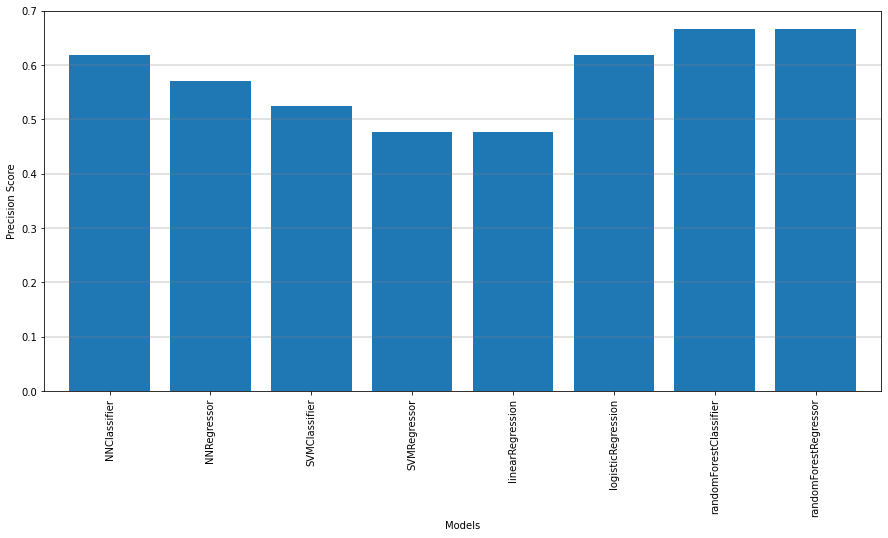

In [181]:
ax = data.plot.bar(x= "model" , y="score", width=0.8, figsize=(15,7));
ax.get_legend().remove()
ax.set_ylabel("Precision Score")
ax.set_xlabel("Models")
plt.axhline(y=0.1, alpha = 0.3, color = "grey");
plt.axhline(y=0.2, alpha = 0.3, color = "grey");
plt.axhline(y=0.3, alpha = 0.3, color = "grey");
plt.axhline(y=0.4, alpha = 0.3, color = "grey");
plt.axhline(y=0.5, alpha = 0.3, color = "grey");
plt.axhline(y=0.6, alpha = 0.3, color = "grey");
finalModelResults[finalModelResults['score']==finalModelResults['score'].max()]

The best model for this Dataset is set to be the Random Forest, with Classification or Regression configuration, they performed the same. The maximum score was 66,67% of precision, so they are actually predicting correctly 14 out of 21 races that happened on the 2019 F1 Season.

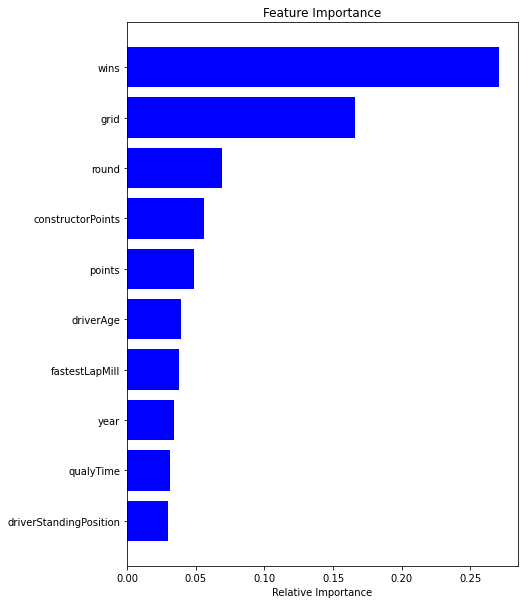

In [185]:
model = RandomForestRegressor()
model.fit(xTrain, yTrain)
importance = model.feature_importances_

features = xTrain.columns
indices = np.argsort(importance)

num_features = 10

plt.figure(figsize=(7,10))
plt.title("Feature Importance")

plt.barh(range(num_features), importance[indices[-num_features:]], color="b", align="center")
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel("Relative Importance")
plt.show()

Using one of the models that performed better, we obtain the most features importances of the Dataset. The most important feature is the wins that the driver had previous of the race to predict, a clue of the performance the driver is having in the season. The second more important feature is the grid position, as we saw before, it is very important on average all the circuits.

Then there are the constructor points, measuring the car performance, the age of the driver, being so special when every year the drivers are younger, etc. 

Looking closer to the results, a pattern of errors is appearing on the same circuits in all the models. Those repetitive errors are located in Red Bull Ring, Hockenheimring, Hungaroring, Spa, Monza, Marina Bay and Interlagos. Why? Well, there could be a lot of factors, but as always on sports, they are (not always in F1) unpredictable: car failures, errors in the pit stops, changing weather, collisions, and so many things that could happen during a race.

## 9. Conclusions

The trained models have ended up being better than I though on a first term. Being the F1 a motorsport that can change in 1 second, the predicting models I was expecting to find vary their score a lot, so in general, I am more than happy to have been proven that maybe F1 is not that unpredecible. But it is always be, so things like collisions, car failures, bad strategies, weather or track conditions, highly affect finding the perfect model.

I would like to have more time and more resources, as I am sure I could do a better performing model. First talking about time, with all the projects we have to deliver and the homework we have to do, I did not offer the time I would to this notebook. And then we have the resources. I am not talking about having a PC or a super computer, I am refering about the data and the academic resources that limited my final results of the model.

For a future application, first of all I have a more than decent model that can predict any F1 season, so I have a very good start point. Then, I would like to improve the model testing with no just 1 season but with an era, summing up the team or the driver that performed better in certain period of time.

The data I am missing is the aerodynamics, the most important part of the current cars, as they become more and more complex through the years. Other data I would like to have on the Dataset is the Practice Sessions. They are useless and do not count for the qualifying or the race, the teams only make test for new car pieces. But, the important thing is that they do race pace tests for the race, and they show how much pace does the car could bring to the driver. Only with this data I think the model could bring better scorings.

Summing up:
- Good model results.
- Driver wins, the grid position and the car performance are the most important features.
- F1 is so unpredictable.
- With more useful data and more resources the model could improve.
- Nice base model to work with on the future.

<img src="img/finish.jpg" style="width: 700px;"/>